In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [289]:
data_23 = pd.read_csv('electricity.csv', header=1, index_col=0).T
data_1mc = pd.read_csv('1MC2024.csv', header=1, index_col=0).T
data_arda = pd.read_csv('Ardamine 2024.csv', header=1, index_col=0).T
data_1 = pd.read_csv('HDF_calckWh_10000826638_26-02-2025.csv')
data_olr = pd.read_csv('HDF_calckWh_10000847339_26-02-2025.csv')


In [293]:
pd.options.mode.copy_on_write = True
usage_by_date_23 = data_23.sum().reset_index()
usage_by_date_1mc = data_1mc.sum().reset_index()
usage_by_date_arda = data_arda.sum().reset_index()
data_1['Date'] = pd.to_datetime(data_1['Read Date and End Time'], dayfirst=True)
grouped_data_1mc = data_1.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
active_export_1mc = grouped_data_1mc[grouped_data_1mc['Read Type'] == 'Active Export Interval (kWh)']

active_export_1mc['Date'] = mdates.num2date(mdates.date2num(active_export_1mc['Date']))
data_olr['Date'] = pd.to_datetime(data_olr['Read Date and End Time'], dayfirst=True)
grouped_data_olr = data_olr.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
active_export_olr = grouped_data_olr[grouped_data_olr['Read Type'] == 'Active Export Interval (kWh)']
active_export_olr['Date'] = mdates.num2date(mdates.date2num(active_export_olr['Date']))
usage_by_date_23['Date'] = mdates.num2date(mdates.date2num(usage_by_date_23['Date']))
grouped_data_olr['Date'] = mdates.num2date(mdates.date2num(grouped_data_olr['Date']))
usage_by_date_1mc['Date'] = mdates.num2date(mdates.date2num(usage_by_date_1mc['Date']))
active_export_1mc['Date'] = mdates.num2date(mdates.date2num(active_export_1mc['Date']))

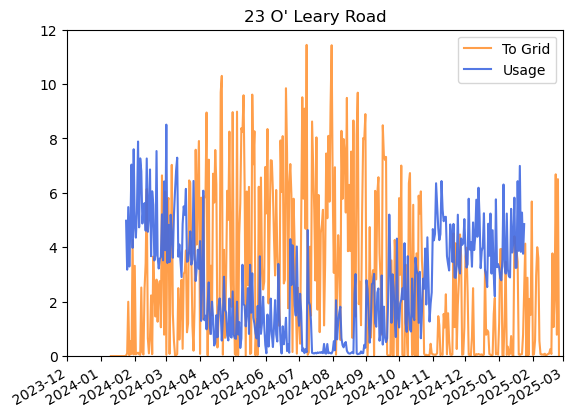

In [ ]:
fig, ax = plt.subplots()
months = mdates.MonthLocator()

ax.plot(active_export_olr['Date'], active_export_olr['Read Value'], label='To Grid', color='tab:orange', alpha=0.75)
ax.plot(usage_by_date_23['Date'], usage_by_date_23[0], label='Usage', color='royalblue', alpha=0.9)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('23 O\' Leary Road')
plt.gca().set_xbound(datetime.date(2024, 1, 24),datetime.date(2025, 1, 23))
plt.gca().set_ybound(0,12)
plt.legend()
plt.show()

# https://matplotlib.org/2.0.2/examples/api/date_demo.html

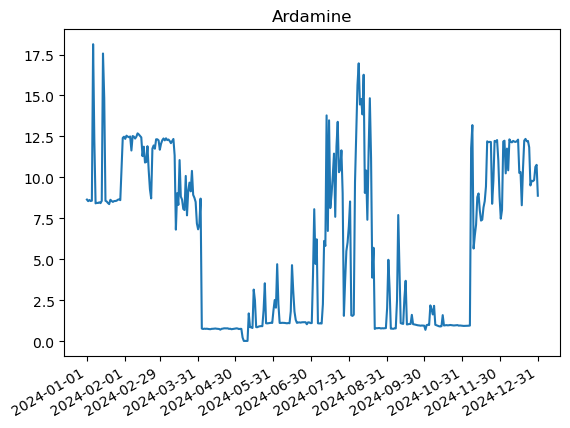

In [54]:
fig, ax = plt.subplots()
months = mdates.MonthLocator()
ax.plot(usage_by_date_arda)
# ax.xaxis_date()
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('Ardamine')
plt.show()

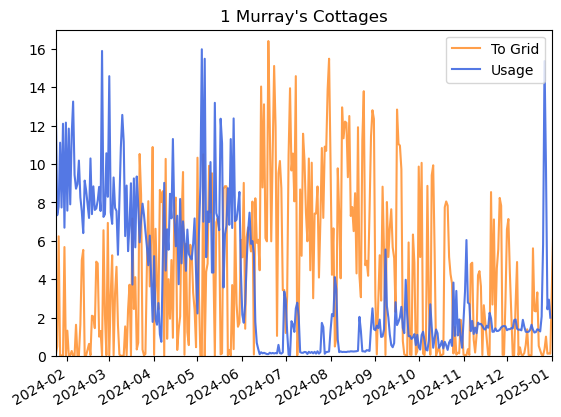

In [305]:
fig, ax = plt.subplots()
months = mdates.MonthLocator()

ax.plot(active_export_1mc['Date'], active_export_1mc['Read Value'], label='To Grid', color='tab:orange', alpha=0.75)
ax.plot(usage_by_date_1mc['Date'], usage_by_date_1mc[0], label='Usage', color='royalblue', alpha=0.9)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('1 Murray\'s Cottages')
plt.gca().set_xbound(datetime.date(2024, 1, 24),datetime.date(2025, 1, 1))
plt.gca().set_ybound(0,17)
plt.legend()
plt.show()